### Approximation of maximum of independent Gaussian variables

Say we have $n$ independent standard standard normal variables. 

Then the distribution of the maximum is well approximated by that of the random variable 

$$
X = \mu_n + \sigma_n G \qquad \mathbb{P}(G \le x) = \exp(-\exp(-x))
$$

We say that $G$ follows a Gumbel distribution. Above,

$$
\mu_n = \Phi^{-1}\left(1-\frac{1}{n}\right) \qquad \sigma_n = \Phi^{-1}\left(1-\frac{1}{n}e^{-1}\right) - \Phi^{-1}\left(1-\frac{1}{n}\right)
$$

In [8]:
import numpy as np
from scipy.stats import gumbel_r as gumbel
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

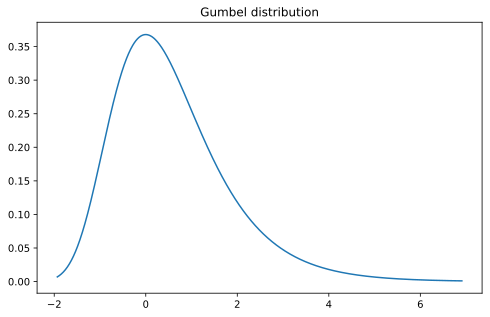

In [21]:
plt.figure(figsize=(8,5))
x = np.linspace(gumbel.ppf(0.001),gumbel.ppf(0.999), 1000)
plt.plot(x, gumbel.pdf(x),label='gumbel pdf')
plt.title('Gumbel distribution')
plt.show()

In [10]:
# Gumbel approximation

def get_mu(n):
    return norm.ppf(1-1/n)

def get_sigma(n):
    return norm.ppf(1-np.exp(-1)/n) - norm.ppf(1-1/n)

def get_pdf(x,mu=0,sigma=1):
    return gumbel.pdf((x-mu)/sigma)/sigma

def get_quantiles(mu,sigma):
    return mu + sigma * np.linspace(gumbel.ppf(0.001),gumbel.ppf(0.999), 1000)

In [14]:
# True distribution

def cdf(t,n,mu=0,absolute=False):
    if absolute:
        log_cdf = n * np.log(norm.cdf(t-mu) - norm.cdf(-t-mu))
    else:
        log_cdf = n * np.log(norm.cdf(t-mu))
        
    return np.exp(log_cdf)

def pdf(t,n,mu=0,absolute=False):
    if absolute:
        return n * (norm.pdf(t-mu) + norm.pdf(-t-mu)) * cdf(t,n-1,mu,absolute)
    else:
        return n * norm.pdf(t-mu) * cdf(t,n-1,mu,absolute)

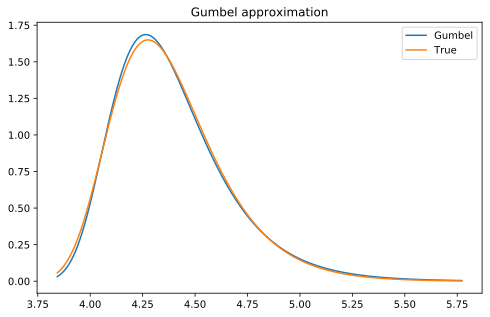

In [22]:
n = 100_000

plt.figure(figsize=(8,5))
mu = get_mu(n)
sigma = get_sigma(n)
q = get_quantiles(mu,sigma)
plt.plot(q, get_pdf(q,mu,sigma),label='Gumbel')
plt.plot(q,pdf(q,n),label='True')
plt.legend()
plt.title('Gumbel approximation')
plt.show()

### Maximum absolute value

Suppose we want now the maximum of $n$ absolute values. We show that the Gumbel approximation above with parameters tuned as if the sample size were $2n$ works well. 



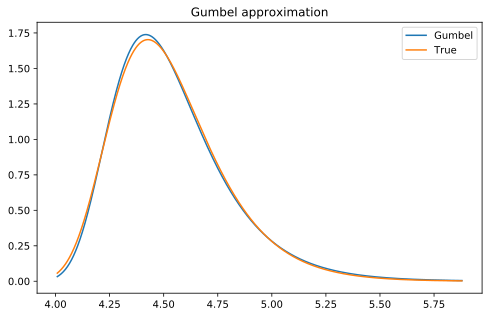

In [23]:
n = 100_000

plt.figure(figsize=(8,5))
mu = get_mu(2*n)
sigma = get_sigma(2*n)
q = get_quantiles(mu,sigma)
plt.plot(q, get_pdf(q,mu,sigma),label='Gumbel')
plt.plot(q,pdf(q,n,absolute=True),label='True')
plt.legend()
plt.title('Gumbel approximation')
plt.show()